0.9062

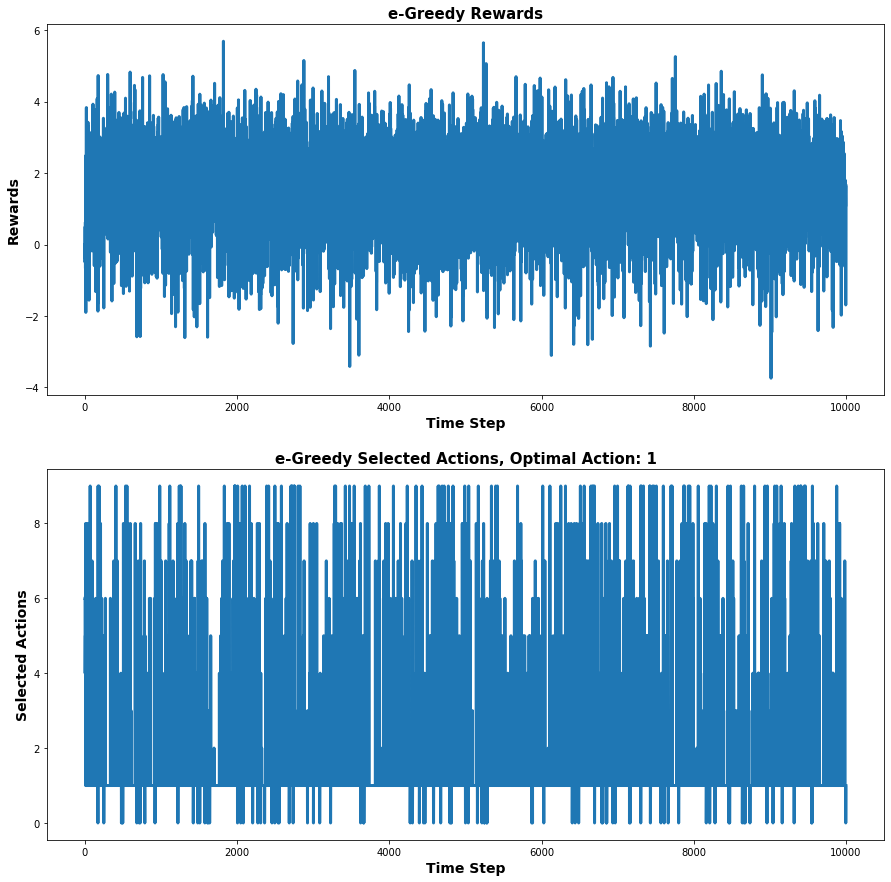

In [123]:
import numpy as np
import matplotlib.pyplot as plt


k = 10
qs = np.random.randn(k)
optimal_action = np.argmax(qs)

T = 10000
selected_actions = np.zeros(T, dtype=np.int64)
received_rewards = np.zeros(T)

epsilon = 0.1

Q = np.zeros(k)
actions_counters = np.zeros(k)

for t in range(T):
    
    selected_actions[t] = np.random.choice(np.where(Q == Q.max())[0]) if np.random.rand() > epsilon else np.random.randint(low=0, high=k)
    received_rewards[t] = qs[selected_actions[t]] + np.random.randn()
    actions_counters[selected_actions[t]] += 1
    
    Q[selected_actions[t]] += (received_rewards[t] - Q[selected_actions[t]]) / actions_counters[selected_actions[t]]
    
optimal_action_percent = len(np.where(selected_actions == optimal_action)[0]) / T


fig, axs = plt.subplots(2, 1, figsize=(15, 15))
axs[0].plot(received_rewards, linewidth=3)
axs[0].set_xlabel('Time Step', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Rewards', fontsize=14, fontweight='bold')
axs[0].set_title('e-Greedy Rewards', fontsize=15, fontweight='bold')

axs[1].plot(selected_actions, linewidth=3)
axs[1].set_xlabel('Time Step', fontsize=14, fontweight='bold')
axs[1].set_ylabel('Selected Actions', fontsize=14, fontweight='bold')
axs[1].set_title(f'e-Greedy Selected Actions, Optimal Action: {optimal_action}', fontsize=15, fontweight='bold')

optimal_action_percent